In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("X train shape: ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X train shape:  (60000, 28, 28)


In [4]:
print("Y train shape: ", y_train.shape)

Y train shape:  (60000,)


In [5]:
#  Build the model

i = Input(shape=x_train[0].shape)
x= LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)

In [6]:
# Compile and train the model

model.compile(optimizer='adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.3201 - accuracy: 0.8980 - val_loss: 0.1211 - val_accuracy: 0.9634
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 0.1045 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0739 - accuracy: 0.9778 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0564 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0469 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0498 -

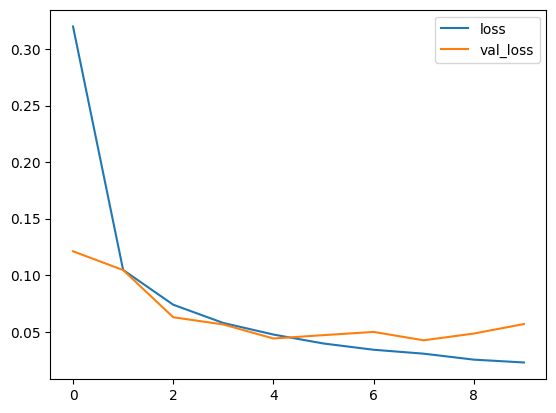

In [7]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

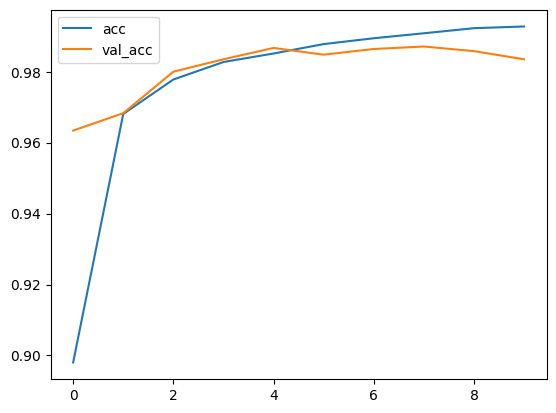

In [8]:
# plot accuracy per iteration

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 7ms/step
Confusion matrix, without normalization
[[ 964    0    1    0    0    1   12    1    1    0]
 [   1 1132    1    0    0    0    1    0    0    0]
 [   3   12 1005    5    0    0    0    3    4    0]
 [   0    0    1 1002    0    5    0    1    1    0]
 [   0    1    0    0  957    1   12    2    1    8]
 [   2    0    0    3    0  883    2    1    0    1]
 [   2    4    0    0    0    4  947    0    0    1]
 [   0   13    9    3    0    1    0  998    0    4]
 [   0    0    1    0    0    9    3    1  958    2]
 [   0    3    0    0    4    4    0    6    3  989]]


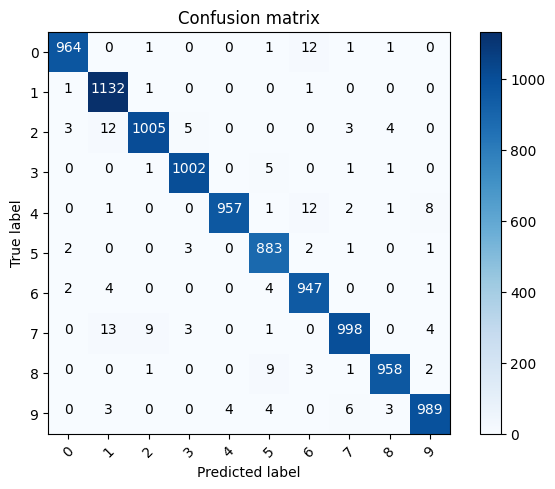

In [9]:
# Plot the confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap= plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

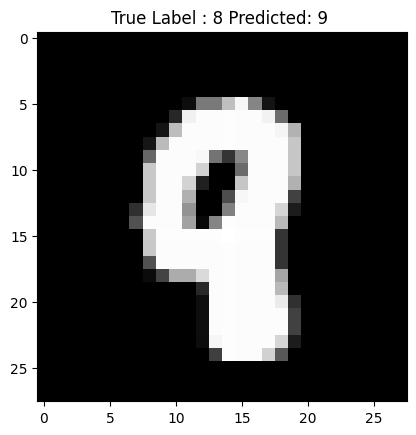

In [12]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label : %s Predicted: %s "% (y_test[i], p_test[i]));